In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [116]:
datos1 = pd.read_csv('ejercicio_1.csv', sep=',')
datos2 = pd.read_csv('ejercicio_2.csv', sep=',')
datos3 = pd.read_csv('ejercicio_3.csv', sep=',')
datos4 = pd.read_csv('ejercicio_4.csv', sep=',')

In [117]:
datos1

,X,Y
0,-4.406280,-1.383344
1,-2.722675,3.918974
2,4.610505,3.513816
3,3.510524,1.139324
4,8.767744,4.575692
...,...,...
95,-3.938697,-3.316558
96,18.097452,14.914027
97,7.836851,6.051094
98,-7.145026,-7.592345


In [118]:
def graficar(df, colA, colB, ejercicio):
    eje_x = []
    eje_y = []
    for index, row in df.iterrows():
        eje_x.append(row[colA])
        eje_y.append(row[colB])

    sns.scatterplot(x = eje_x, y = eje_y, color='skyblue', legend=False)
    plt.title('Scatter Plot ' + ejercicio)
    plt.xlabel('X')
    plt.ylabel('Y')

In [119]:
def graficar_recta(df, colA, colB, ejercicio):
    eje_x = df[colA].to_numpy()
    eje_y = df[colB].to_numpy()

    # Asegurarse de que tengan la misma longitud
    assert eje_x.shape == eje_y.shape

    # Agregar columna de 1s para incluir el intercepto (beta_0)
    X_matrix = np.column_stack((np.ones_like(eje_x), eje_x))

    beta = np.linalg.inv(X_matrix.T @ X_matrix) @ X_matrix.T @ eje_y

    intercepto = beta[0]
    pendiente = beta[1]

    sns.scatterplot(x = eje_x, y = eje_y, color='skyblue', legend=False)

    # Recta ajustada
    x_vals = np.linspace(eje_x.min(), eje_x.max(), 100)
    y_vals = intercepto + pendiente * x_vals
    plt.plot(x_vals, y_vals, color='red', label='Recta ajustada')

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Regresión lineal ' + ejercicio)
    plt.legend()
    plt.show()

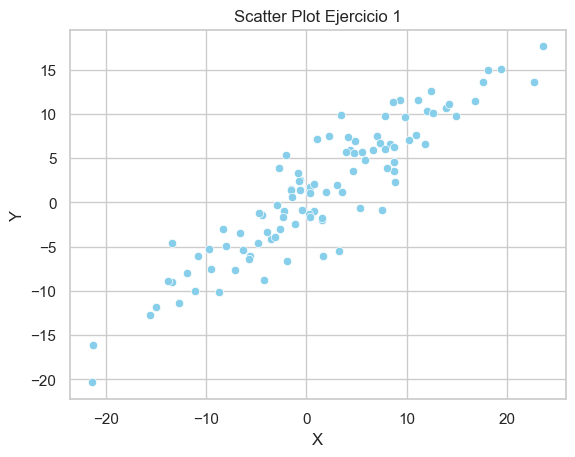

In [120]:
graficar(datos1, 'X', 'Y', 'Ejercicio 1')

Hallamos la recta que mejor aproxima los datos

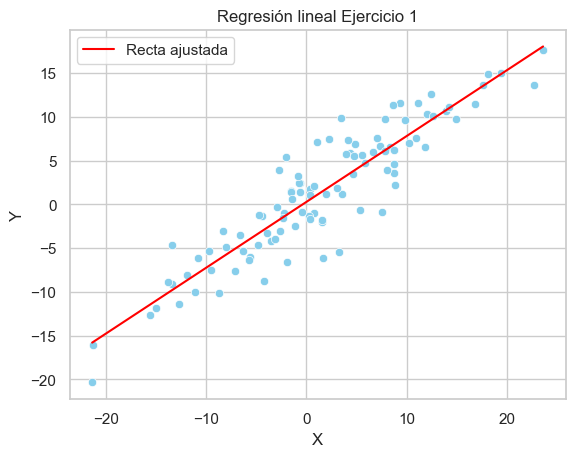

In [121]:
graficar_recta(datos1, 'X', 'Y', 'Ejercicio 1')

Repetimos los incisos (a) y (b), pero considerando los puntos {($x_i$, $y_i$ + 12) con i = 1...n}, donde ($x_i$, $y_i$) eran los puntos originales.


In [122]:
datos1c = datos1.copy()

for index, row in datos1c.iterrows():
    row['Y'] += 12

In [123]:
datos1c

,X,Y
0,-4.406280,10.616656
1,-2.722675,15.918974
2,4.610505,15.513816
3,3.510524,13.139324
4,8.767744,16.575692
...,...,...
95,-3.938697,8.683442
96,18.097452,26.914027
97,7.836851,18.051094
98,-7.145026,4.407655


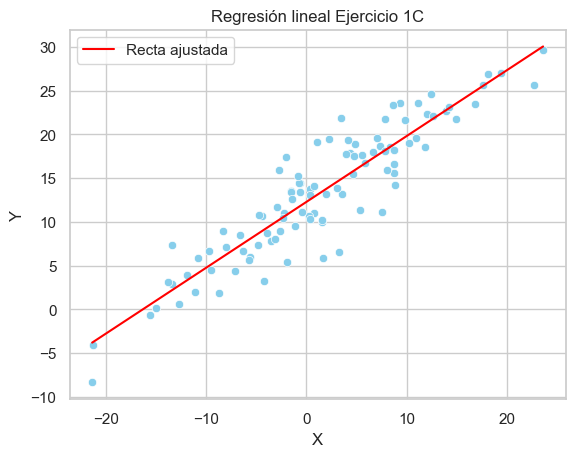

In [124]:
graficar_recta(datos1c, 'X', 'Y', 'Ejercicio 1C')

Extendemos el modelo para poder aproximar cualquier recta en el plano


...

### Ejercicio 2

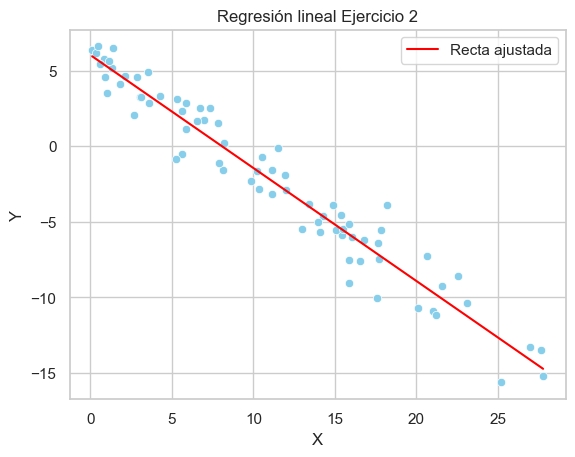

In [125]:
graficar_recta(datos2, 'X', 'Y',  'Ejercicio 2')

### Ejercicio 3

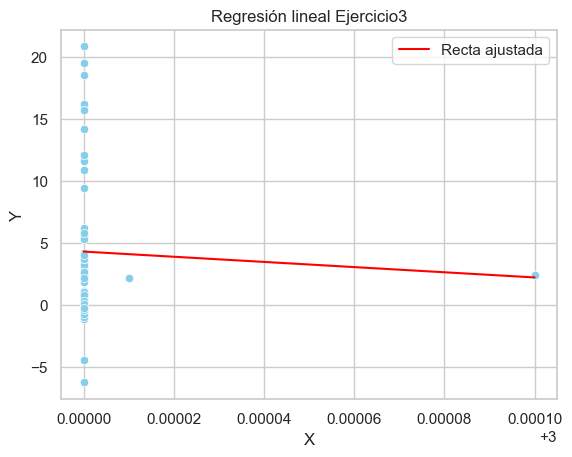

In [126]:
graficar_recta(datos3, 'X', 'Y', 'Ejercicio3')

In [127]:
datos3

,X,Y
0,3.00010,2.425000
1,3.00000,1.073500
2,3.00000,0.824700
3,3.00000,5.336756
4,3.00000,20.836000
5,3.00000,-0.236000
6,3.00000,16.233600
7,3.00000,0.335000
8,3.00000,11.573600
9,3.00001,2.213650


Calculamos el determinante de $X^T$ $X$

In [128]:
X = datos3['X'].values.reshape(-1,1)

X = np.hstack([np.ones((X.shape[0],1)), X])

XtX = (X.T) @ X

det = np.linalg.det(XtX)

print(det)
print(round(det))

4.82800678337867e-07
0


### Ejercicio 4

In [129]:
datos4

,x_vector,y_error
0,0.261293,5.269016
1,0.282008,4.467631
2,0.624273,3.018444
3,0.727334,3.076645
4,0.899138,2.455100
5,1.110197,2.045111
6,1.140416,2.053735
7,1.277370,1.144468
8,1.550047,0.664446
9,1.567954,0.857060


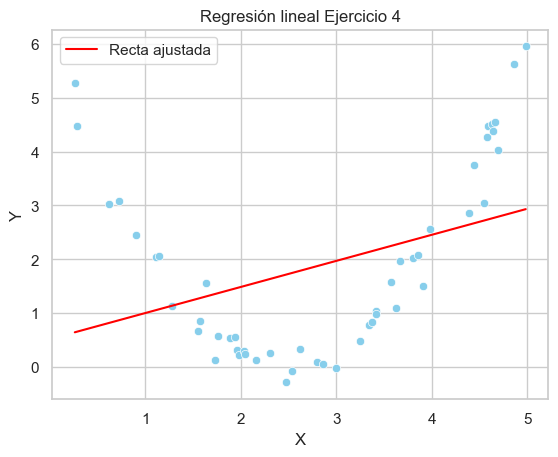

In [130]:
graficar_recta(datos4, 'x_vector', 'y_error', 'Ejercicio 4')

En este caso, ya que no hay linealidad en los datos, utilizaremos una curva en vez de una recta para aproximar los datos.

In [ ]:
def graficar_curva(df, colA, colB, ejercicio):
    eje_x = df[colA].to_numpy()
    eje_y = df[colB].to_numpy()

    # Asegurarse de que tengan la misma longitud
    assert eje_x.shape == eje_y.shape

    # Agregar columna de 1s para incluir el intercepto (beta_0)
    X_matrix = np.column_stack((np.ones_like(eje_x), eje_x, eje_x**2))

    beta = np.linalg.inv(X_matrix.T @ X_matrix) @ X_matrix.T @ eje_y

    intercepto = beta[0]
    pendiente = beta[1]
    coef_cuadratico = beta[2]

    sns.scatterplot(x = eje_x, y = eje_y, color='skyblue', legend=False)

    # Curva ajustada
    x_vals = np.linspace(eje_x.min(), eje_x.max(), 100)
    y_vals = intercepto + pendiente * x_vals + coef_cuadratico * x_vals**2
    plt.plot(x_vals, y_vals, color='purple', label='Curva ajustada')

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Regresión cuadrática ' + ejercicio)
    plt.legend()
    plt.show()

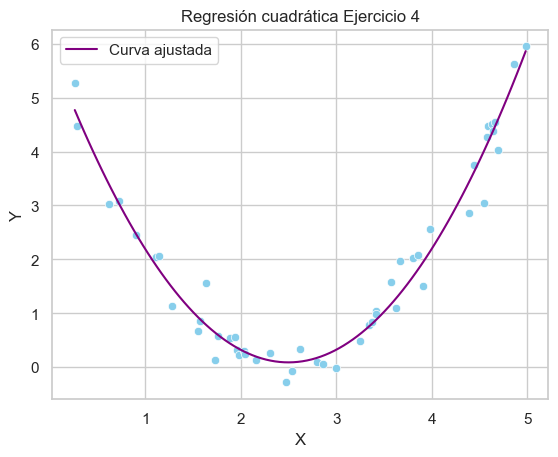

In [132]:
graficar_curva(datos4, 'x_vector', 'y_error', 'Ejercicio 4')

In [159]:
def graficar_recta_polinomial(df, colA, colB, ejercicio, grado):
    eje_x = df[colA].to_numpy()
    eje_y = df[colB].to_numpy()

    # Asegurarse de que tengan la misma longitud
    assert eje_x.shape == eje_y.shape

    # Agregar columna de 1s y X^2, X^3, ..., X^grado
    X_matrix = np.column_stack([eje_x**i for i in range(grado+1)])

    # Cálculo de los coeficientes (beta_0, beta_1, ..., beta_grado)
    beta = np.linalg.inv(X_matrix.T @ X_matrix) @ X_matrix.T @ eje_y

    # Predicción de la curva ajustada
    x_vals = np.linspace(eje_x.min(), eje_x.max(), 100)
    X_vals_matrix = np.column_stack([x_vals**i for i in range(grado+1)])
    y_vals = X_vals_matrix @ beta

    sns.scatterplot(x = eje_x, y = eje_y, color='skyblue', legend=False)

    # Graficar la curva ajustada
    plt.plot(x_vals, y_vals, color='red', label=f'Curva ajustada (Grado {grado})')

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(f'Regresión polinómica de grado {grado} - {ejercicio}')
    plt.legend()
    plt.show()


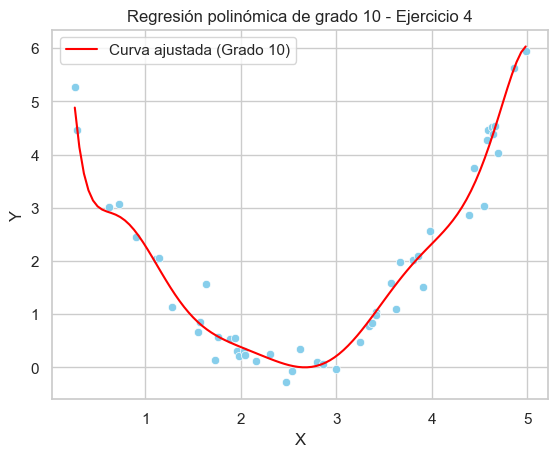

In [161]:
graficar_recta_polinomial(datos4, 'x_vector', 'y_error', 'Ejercicio 4', 10)

# Tercera Parte

In [135]:
student_performance = pd.read_csv('student_performance.csv')

Separamos los datos en training set y un test set

In [136]:
train = pd.read_csv('student_performance.csv', nrows=450)
test = pd.read_csv('student_performance.csv', skiprows=range(1,451))

In [137]:
train

,X1 Hours Studied,X2 Previous Scores,X3 Extracurricular Activities,X4 Sleep Hours,X5 Sample Question Papers Practiced,Y Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0
...,...,...,...,...,...,...
445,3,56,0,7,6,36.0
446,9,98,0,6,7,96.0
447,1,82,1,9,4,62.0
448,1,47,0,9,2,22.0


In [138]:
test

,X1 Hours Studied,X2 Previous Scores,X3 Extracurricular Activities,X4 Sleep Hours,X5 Sample Question Papers Practiced,Y Performance Index
0,9,84,0,6,6,79.0
1,6,92,0,7,3,82.0
2,3,75,1,5,8,55.0
3,1,46,1,4,3,22.0
4,4,85,1,5,9,70.0
...,...,...,...,...,...,...
145,5,99,0,7,5,89.0
146,3,85,0,9,7,65.0
147,1,76,1,4,2,49.0
148,5,60,0,9,0,48.0


Usamos los datos de train para estimar los parámetros $\hat{\beta}$ que minimizan el error cuadrático medio para este problema.

In [139]:
# Separar variables independientes (X1,...,X5) y dependiente (Y)
X_train = train.drop(columns='Y Performance Index').to_numpy()  
Y_train = train['Y Performance Index'].to_numpy().reshape(-1, 1) 

# Agregar columna de unos a X para el intercepto
X_train = np.column_stack((np.ones(X_train.shape[0]), X_train))

# Usamos la fórmula que obtuvimos en la parte 1
beta_estimados = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ Y_train

# Guardamos los coeficientes estimados en un diccionario 
betas = dict()
for i in range(len(beta_estimados)):
    betas[f'Beta_{i}'] = beta_estimados[i][0]

betas

{'Beta_0': np.float64(-34.470322275015846),
 'Beta_1': np.float64(2.867108200658482),
 'Beta_2': np.float64(1.0235029752682696),
 'Beta_3': np.float64(0.5577888608665669),
 'Beta_4': np.float64(0.4623469612316101),
 'Beta_5': np.float64(0.20686477319049779)}

A partir de los valores estimados de los coeficientes, calculamos $\hat{y}$ como:
$$
\hat{y} = \beta_0 + \beta_1 X1_i + \beta_2 X2_i + \beta_3 X3_i + \beta_4 X4_i + \beta_5 X5_i
$$

En notación matricial
$$
\hat{y} = X \hat{\beta}
$$

In [140]:
y_estimada_train = X_train @ beta_estimados

In [141]:
y_estimada_train

array([[91.85200597],
       [63.18847189],
       [44.8731422 ],
       [36.37062666],
       [67.09525783],
       [59.36654569],
       [64.42586463],
       [38.17254256],
       [62.78745306],
       [69.93926317],
       [84.48902579],
       [72.51108969],
       [26.81049436],
       [33.10008416],
       [65.61330069],
       [47.42609051],
       [68.26628417],
       [71.89102101],
       [30.80201446],
       [59.8643706 ],
       [72.7513515 ],
       [85.14973521],
       [72.10827793],
       [58.94746227],
       [39.95935991],
       [53.67829628],
       [63.41540422],
       [81.88096072],
       [74.7064765 ],
       [75.00825753],
       [40.97949573],
       [35.55934233],
       [56.70408058],
       [49.01923557],
       [59.5136403 ],
       [76.09005333],
       [41.70415608],
       [69.13837099],
       [30.17059925],
       [63.86418297],
       [47.38629102],
       [39.0764522 ],
       [55.50804531],
       [37.87601851],
       [71.43560215],
       [54

Agregamos una columna para $\hat{y}$ 

In [142]:
train['Y Estimada'] = y_estimada_train.flatten()

In [143]:
train

,X1 Hours Studied,X2 Previous Scores,X3 Extracurricular Activities,X4 Sleep Hours,X5 Sample Question Papers Practiced,Y Performance Index,Y Estimada
0,7,99,1,9,1,91.0,91.852006
1,4,82,0,4,2,65.0,63.188472
2,8,51,1,7,2,45.0,44.873142
3,5,52,1,5,2,36.0,36.370627
4,7,75,0,8,5,66.0,67.095258
...,...,...,...,...,...,...,...
445,3,56,0,7,6,36.0,35.924786
446,9,98,0,6,7,96.0,95.859078
447,1,82,1,9,4,62.0,57.870401
448,1,47,0,9,2,22.0,21.076278


Definimos el error cuadrático medio (ECM) como el promedio de los errores (la diferencia entre la realidad y la predicción para cada observación) al cuadrado:

$$
ECM = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

Calculamos ECM para los datos de train

In [144]:
n = train.shape[0]
sumatoria = 0
for index, row in train.iterrows():
        sumatoria += (row['Y Performance Index'] - row['Y Estimada']) ** 2
ecm_train = sumatoria / n
ecm_train

np.float64(3.6009036870388864)

Repetimos los pasos para el conjunto de testeo

In [145]:
X_test = test.drop(columns='Y Performance Index').to_numpy()  
Y_test = test['Y Performance Index'].to_numpy().reshape(-1, 1) 

X_test = np.column_stack((np.ones(X_test.shape[0]), X_test))

# Estimamos Y con los betas obtenidos de training
y_estimada_test = X_test @ beta_estimados
y_estimada_test

array([[81.32317186],
       [80.7516237 ],
       [55.41816732],
       [18.50569381],
       [68.72717005],
       [38.88638202],
       [43.96538364],
       [62.9361219 ],
       [72.92135519],
       [39.04558377],
       [55.15365718],
       [42.77049385],
       [26.040155  ],
       [56.02794075],
       [63.67738576],
       [37.35129484],
       [76.85764537],
       [69.11925782],
       [33.46761176],
       [43.6501313 ],
       [84.02677572],
       [32.90413717],
       [26.25447351],
       [41.30827241],
       [55.57431482],
       [60.63291703],
       [85.5669288 ],
       [41.53718769],
       [52.20274159],
       [68.76876248],
       [61.00096757],
       [36.78383056],
       [90.59067289],
       [87.4155723 ],
       [30.39753158],
       [20.45735476],
       [68.32615122],
       [39.46120314],
       [26.07962265],
       [44.56096903],
       [81.12366393],
       [17.02909054],
       [64.48363182],
       [75.33232779],
       [23.69526082],
       [57

In [146]:
test['Y Estimada'] = y_estimada_test.flatten()

In [157]:
n = test.shape[0]
sumatoria = 0
for index, row in test.iterrows():
        sumatoria += (row['Y Performance Index'] - row['Y Estimada']) ** 2
ecm_test = sumatoria / n
ecm_test

np.float64(4.436433561918473)

Cómo cambia el ECM de test si calculamos los coeficientes con todas las observaciones?

In [148]:
X_sp = student_performance.drop(columns='Y Performance Index').to_numpy()  
Y_sp = student_performance['Y Performance Index'].to_numpy().reshape(-1, 1) 

X_sp = np.column_stack((np.ones(X_sp.shape[0]), X_sp))

# Usamos la fórmula que obtuvimos en la parte 1
beta_estimados_sp = np.linalg.inv(X_sp.T @ X_sp) @ X_sp.T @ Y_sp

# Guardamos los coeficientes estimados en un diccionario 
betas_sp = dict()
for i in range(len(beta_estimados_sp)):
    betas_sp[f'Beta_{i}'] = beta_estimados_sp[i][0]

betas_sp

{'Beta_0': np.float64(-33.95836743772129),
 'Beta_1': np.float64(2.8422556937118904),
 'Beta_2': np.float64(1.0198310553392607),
 'Beta_3': np.float64(0.611780373746357),
 'Beta_4': np.float64(0.44369872380689535),
 'Beta_5': np.float64(0.2112072561400731)}

In [149]:
y_estimada_test2 = X_test @ beta_estimados_sp
y_estimada_test2

array([[81.21717833],
       [80.65913665],
       [55.57566084],
       [18.81631384],
       [68.82743434],
       [38.92420112],
       [44.05700397],
       [62.97081155],
       [72.85938307],
       [39.25233373],
       [55.18145092],
       [42.85264417],
       [26.17042221],
       [56.17307738],
       [63.59389897],
       [37.48773151],
       [76.83269794],
       [69.1774384 ],
       [33.61358433],
       [43.74234502],
       [84.00105443],
       [33.07905153],
       [26.45348273],
       [41.39524727],
       [55.591805  ],
       [60.71738454],
       [85.40862085],
       [41.71154978],
       [52.21821006],
       [68.83116116],
       [61.02857092],
       [36.87531523],
       [90.45917748],
       [87.31488045],
       [30.60838704],
       [20.71751213],
       [68.34532965],
       [39.57885285],
       [26.27498421],
       [44.65386333],
       [81.04820652],
       [17.2991241 ],
       [64.42061341],
       [75.26460617],
       [23.88365055],
       [57

In [150]:
test['Y Estimada 2'] = y_estimada_test2.flatten()

In [151]:
y_estimada_train2 = X_train @ beta_estimados_sp
train['Y Estimada 2'] = y_estimada_train2.flatten()

In [152]:
errores = []

for index, row in train.iterrows():
        error_abs = abs(row['Y Performance Index'] - row['Y Estimada 2'])
        errores.append(error_abs)
for index, row in test.iterrows():
        error_abs = abs(row['Y Performance Index'] - row['Y Estimada 2'])
        errores.append(error_abs)

In [153]:
errores.sort()
errores

[np.float64(0.003821659961225521),
 np.float64(0.004909477320836686),
 np.float64(0.00625236140199803),
 np.float64(0.007763448618860025),
 np.float64(0.010332742695752017),
 np.float64(0.012814279167805864),
 np.float64(0.013791181194090285),
 np.float64(0.022890921099488537),
 np.float64(0.025991622364927025),
 np.float64(0.0314049527590754),
 np.float64(0.04216969288178518),
 np.float64(0.045006989245315765),
 np.float64(0.052073345901682444),
 np.float64(0.05332443560651967),
 np.float64(0.053598117688174796),
 np.float64(0.059485991629017576),
 np.float64(0.060589998129724876),
 np.float64(0.06885211304910399),
 np.float64(0.07079975151324902),
 np.float64(0.07800248341691685),
 np.float64(0.07945563960439728),
 np.float64(0.08383772909816756),
 np.float64(0.08731144678370129),
 np.float64(0.09123926368903312),
 np.float64(0.09269062664822059),
 np.float64(0.09306102249986736),
 np.float64(0.0940759168255596),
 np.float64(0.10449795885516266),
 np.float64(0.11794743095299509),
 np

Creamos un histograma para mostrar la distribución de los errores

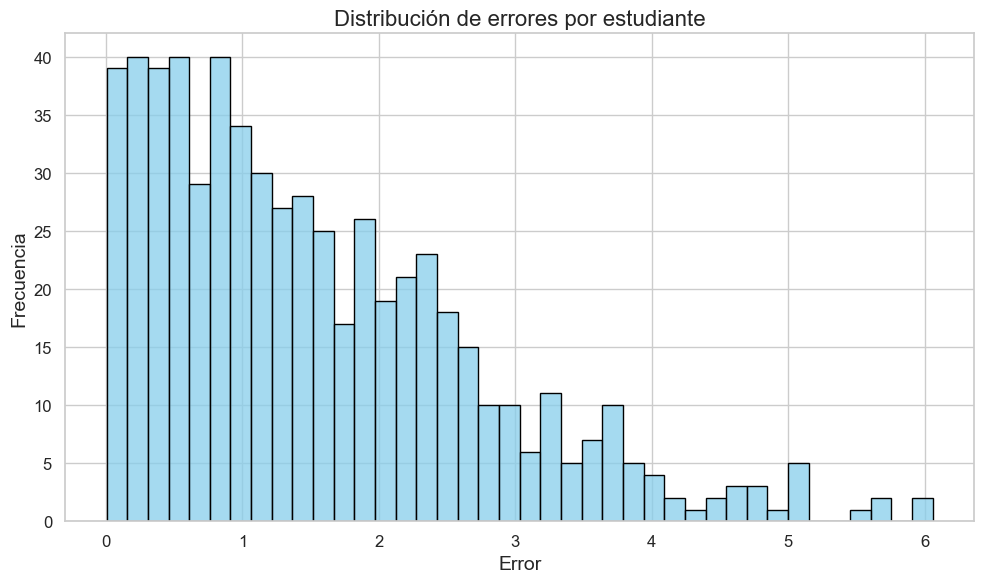

In [154]:
plt.figure(figsize=(10, 6))  
sns.histplot(errores, bins=40, color='skyblue', edgecolor='black')
plt.title('Distribución de errores por estudiante', fontsize=16)
plt.xlabel('Error', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()